# Curve Fitting

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
    

In [2]:
def linearReg(X,Y):
    n=len(X)
    XxY=[]
    X2=[]
    Y2=[]
    
    for i in range(n):
        XxY.append(X[i]*Y[i])
        X2.append(X[i]**2)
        Y2.append(Y[i]**2)
    a1=(n*sum(XxY)-sum(X)*sum(Y))/(n*sum(X2)-sum(X)**2)
    
    a0=sum(Y)/n-a1*sum(X)/n
    
    
    
    Sr=0
    St=0
    #model=[]
    for i in range(n):
        St+=(Y[i]-sum(Y)/n)**2
        Sr+=(Y[i]-a0-a1*X[i])**2
        #model.append(a0+a1*X[i])
    r2=(St-Sr)/St
    StandarErrorOfTheEstimate=math.sqrt(Sr/(n-2))
    
    print("a1 = "+str(a1))
    print("a0 = "+str(a0))
    print("Sr = "+str(Sr))
    print("St = "+str(St))
    print("Sy/x = "+str(StandarErrorOfTheEstimate))
    print("r^2 = "+str(r2))
    
    xmodel = np.linspace(X[0],X[-1],100)
    ymodel = a1*xmodel+a0
    plt.plot(xmodel, ymodel, '-r', label='model')
    plt.title('linear regresssion')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    
    plt.scatter(X,Y,)
    plt.show()
    return [a1,a0]
    
    

a1 = 1.992125991087338
a0 = 0.40978765454400423
Sr = 0.00023463550335468613
St = 2.2129734768163765
Sy/x = 0.008843745499027098
r^2 = 0.9998939727449005


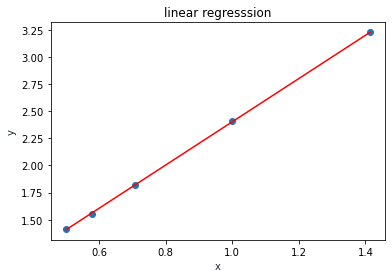

4.861361656451311
2.440288253956213


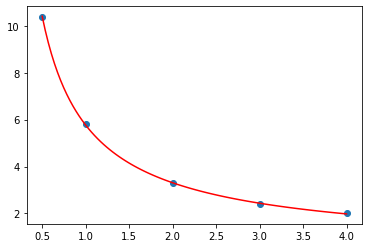

In [83]:
X=[0.5,1,2,3,4]
Y=[10.4,5.8,3.3,2.4,2]
Ysqrt=[math.sqrt(a) for a in Y]
Xchange=[1/math.sqrt(a) for a in X]

item=linearReg(Xchange,Ysqrt)

a1=item[0]
a0=item[1]
b=1/a0
a=a1*b
print(a)
print(b)
plt.scatter(X,Y)
xmodel = np.linspace(X[0],X[-1],100)
#ymodel = a1*math.exp(xmodel*B1)
ymodel=[]
for x in xmodel:
    ymodel.append(((a+math.sqrt(x))/(b*math.sqrt(x)))**2)
plt.plot(xmodel, ymodel, '-r', label='model')


In [131]:
def regPolynomial(X,Y):
    from numpy.linalg import inv
    n=len(X)
    
    Sxi=sum(X)
    Sxi2=0
    Sxi3=0
    Sxi4=0
    Syi=0
    Sxiyi=0
    Sxi2yi=0
    for i in range(n):
        Sxi2+=X[i]**2
        Sxi3+=X[i]**3
        Sxi4+=X[i]**4
        Syi+=Y[i]
        Sxiyi+=X[i]*Y[i]
        Sxi2yi+=Y[i]*X[i]**2
    A=np.matrix([[n,Sxi, Sxi2], [Sxi,Sxi2, Sxi3],[Sxi2,Sxi3,Sxi4]])
    B=np.matrix([[Syi],[Sxiyi],[Sxi2yi]])
    Res=inv(A)@B
    print(Res)
    
    a0=Res[0][0]
    a1=Res[1][0]
    a2=Res[2][0]
    
    
    plt.scatter(X,Y)
    xmodel = np.linspace(X[0],X[-1],100)
    print(xmodel)
    ymodel=[]
    for x in xmodel:
        
        calcul=a0+a1*x+a2*x**2
        
        ymodel.append(calcul)
    plt.plot(xmodel, ymodel, '-r', label='model')
    

[[ 609.47325534]
 [-771.36856451]
 [ 930.89991229]]
[0.2        0.22121212 0.24242424 0.26363636 0.28484848 0.30606061
 0.32727273 0.34848485 0.36969697 0.39090909 0.41212121 0.43333333
 0.45454545 0.47575758 0.4969697  0.51818182 0.53939394 0.56060606
 0.58181818 0.6030303  0.62424242 0.64545455 0.66666667 0.68787879
 0.70909091 0.73030303 0.75151515 0.77272727 0.79393939 0.81515152
 0.83636364 0.85757576 0.87878788 0.9        0.92121212 0.94242424
 0.96363636 0.98484848 1.00606061 1.02727273 1.04848485 1.06969697
 1.09090909 1.11212121 1.13333333 1.15454545 1.17575758 1.1969697
 1.21818182 1.23939394 1.26060606 1.28181818 1.3030303  1.32424242
 1.34545455 1.36666667 1.38787879 1.40909091 1.43030303 1.45151515
 1.47272727 1.49393939 1.51515152 1.53636364 1.55757576 1.57878788
 1.6        1.62121212 1.64242424 1.66363636 1.68484848 1.70606061
 1.72727273 1.74848485 1.76969697 1.79090909 1.81212121 1.83333333
 1.85454545 1.87575758 1.8969697  1.91818182 1.93939394 1.96060606
 1.98181818

ValueError: x and y can be no greater than 2D, but have shapes (100,) and (100, 1, 1)

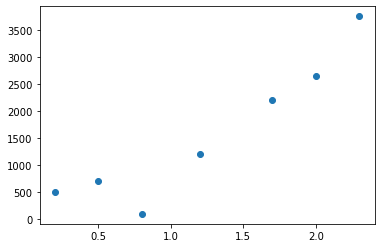

In [132]:
X=[0.2,0.5,0.8,1.2,1.7,2,2.3]
Y=[500,700,100,1200,2200,2650,3750]
regPolynomial(X,Y)



In [2]:
def generalLeastSquareReg(Z,Y,X):
    n=len(X)
    from numpy.linalg import inv
    Z=np.array(Z)
    Y=np.array(Y)
    Zt=Z.copy()
    Zt=Zt.transpose()
    
    A=inv(Zt@Z)@Zt@Y
    print(A)
    
    ###############################
    #Modify this part in the exam#
    #############################
    
    
    """Ymodel=[]
    #add model
    for x in X:
        Ymodel.append((alpha*x**2+beta*x+1)/(gamma*x))
    
    St=0
    Sr=0
    
    for i in range(n):
        St+=(Y[i]-sum(Y)/n)**2
        Sr+=(Y[i]-Ymodel[i])**2
    r2=(St-Sr)/St
    
    StandardError=math.sqrt(Sr/(n-3))
    
    print(" St = "+str(St))
    print("Sr  = "+str(Sr))
    print("r^2 = "+str(r2))
    print("Sy/x = "+str(StandardError))"""
        
    
    
    

In [6]:
Y=[3.108,-1.334,-5.679,25.867,7.622,-11.356]
Z=[[1,0,0,0],[1,4,0,0],[1,8,0,0],[1,0,5,0],[1,4,5,20],[1,8,5,40]]
X=[0.06,0.58,1.38,2.17,3.86]
generalLeastSquareReg(Z,Y,X)


[ 3.09183333 -1.098375    4.57946667 -0.7109    ]


In [5]:
def multipleLinearReg(X1,X2,Y):
    from numpy.linalg import inv
    n=len(X1)
    Sx1i=sum(X1)
    Sx2i=sum(X2)
    Sx1i2=0
    Sx2i2=0
    Sx1x2=0
    Sy=sum(Y)
    Sx1y=0
    Sx2y=0
    for i in range(n):
        Sx1i2+=X1[i]**2
        Sx2i2+=X2[i]**2
        Sx1x2+=X1[i]*X2[i]
        Sx1y+=X1[i]*Y[i]
        Sx2y+=X2[i]*Y[i]
    
        
    A=np.array([[n,Sx1i,Sx2i],[Sx1i,Sx1i2,Sx1x2],[Sx2i,Sx1x2,Sx2i2]])
    
    Z=np.array([[Sy],[Sx1y],[Sx2y]])
    Res=inv(A)@Z
    print(Res)
    St=0
    Sr=0
    a0=Res[0][0]
   
    a1=Res[1][0]
    a2=Res[2][0]
    for i in range(n):
        St+=(Y[i]-sum(Y)/n)**2
        Sr+=(Y[i]-a0-a1*X1[i]-a2*X2[i])**2
    r2=(St-Sr)/St
    
    print("St= "+str(St))
    print("Sr = "+str(Sr))
    print("r^2 = "+str(r2))
    print("r = "+str(math.sqrt(r2)))
    print("Sy/x = "+str(math.sqrt(Sr/(n-3))))#maybe -2 idk
    

In [6]:
X1=[4,6,4,6]
X2=[2,2,4,4]
Y=[53.5,48.15,38.43,35.03]
multipleLinearReg(X1,X2,Y)

[[75.8575]
 [-2.1875]
 [-7.0475]]
St= 218.76027499999998
Sr = 0.9506250000000027
r^2 = 0.9956544898291063
r = 0.9978248793396095
Sy/x = 0.9750000000000014
